In [13]:
#Loading the data set

import pandas as pd

cols = list(pd.read_csv("kc_house_data.csv", nrows =1))
data = pd.read_csv("kc_house_data.csv", usecols =[i for i in cols if i not in ["id","date","zipcode"]])

data1 = data.drop(columns=['price'])

dict1={}

#computing  the average value, the min and max and variance values:

for col in data1.columns:
    if not "Feature" in dict1:
        dict1["Feature"] = [col]
    else:
        dict1["Feature"].append(col)
    if not "Average" in dict1:
        dict1["Average"] = [data1[col].mean()]
    else:
        dict1["Average"].append(data1[col].mean())
    if not "Min" in dict1:
        dict1["Min"] = [data1[col].min()]
    else:
        dict1["Min"].append(data1[col].min())
    if not "Max" in dict1:
        dict1["Max"] = [data1[col].max()]
    else:
        dict1["Max"].append(data1[col].max()) 
    if not "Variance" in dict1:
        dict1["Variance"] = [data1[col].var()]
    else:
        dict1["Variance"].append(data1[col].var())
        
df = pd.DataFrame(dict1)
df    
    




,Feature,Average,Min,Max,Variance
0,bedrooms,3.370842,0.0000,3.300000e+01,8.650150e-01
1,bathrooms,2.114757,0.0000,8.000000e+00,5.931513e-01
2,sqft_living,2079.899736,290.0000,1.354000e+04,8.435337e+05
3,sqft_lot,15106.967566,520.0000,1.651359e+06,1.715659e+09
4,floors,1.494309,1.0000,3.500000e+00,2.915880e-01
5,waterfront,0.007542,0.0000,1.000000e+00,7.485226e-03
6,view,0.234303,0.0000,4.000000e+00,5.872426e-01
7,condition,3.409430,1.0000,5.000000e+00,4.234665e-01
8,grade,7.656873,1.0000,1.300000e+01,1.381703e+00
9,sqft_above,1788.390691,290.0000,9.410000e+03,6.857347e+05


In [14]:
## Feaure with Minimum Variance
df.loc[df['Variance'] == df["Variance"].min()]

,Feature,Average,Min,Max,Variance
5,waterfront,0.007542,0.0,1.0,0.007485


In [15]:
## Feature with Maximum Variance
df.loc[df['Variance'] == df["Variance"].max()]

,Feature,Average,Min,Max,Variance
3,sqft_lot,15106.967566,520.0,1651359.0,1.715659e+09


In [26]:
#Correlation of the features with response
corr_data = data.corr(method="pearson")
corr_data.iloc[0:1,1:]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,0.30835,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447


In [22]:
# Positive and negative correlation

temp = corr_data.iloc[0:1,1:]
positive_correlation =[]
negative_correlation = []

for i in temp:
    coeff = temp[i]
    if coeff[0]> 0 :
        positive_correlation.append(i)
    else:
        negative_correlation.append(i)
        
print("Positive Correlation:", positive_correlation)
print("Negative Correlation:", negative_correlation)
        
        

Positive Correlation: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Negative Correlation: []


In [25]:
# Maximum correlated feature

temp = corr_data.iloc[0:1,1:]
max_corr_feature = temp.idxmax(axis=1)[0]
max_corr_value = temp.max(axis=1)[0]


print("Maximum correlated feature: "+ max_corr_feature)        


Maximum correlated feature: sqft_living


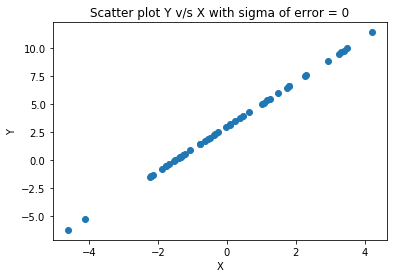

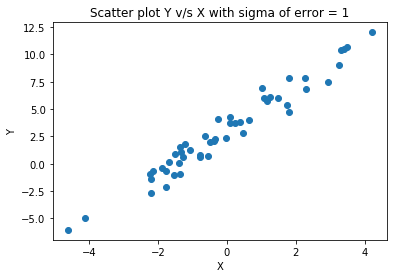

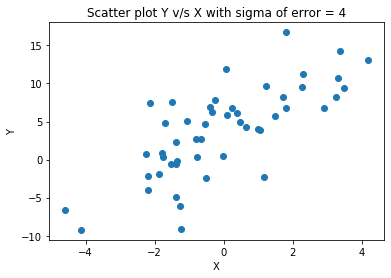

In [23]:
# importing the required module

import matplotlib.pyplot as plt
import numpy as np
mu, sigma = 0,2
np.random.seed(1)
X = np.random.normal(mu,sigma,50)
for i in [0,1,4]:
    e = np.random.normal(mu,i,50)
    Y = 3 + 2*X + e
    plt.scatter(X,Y)
    title = "Scatter plot Y v/s X with sigma of error = " + str(i)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [24]:
# Correlation for different values of sigma of error

from scipy.stats import pearsonr
mu, sigma = 0,2
np.random.seed(1)
X = np.random.normal(mu,sigma,50)

for i in [0,1,4]:
    e = np.random.normal(mu,i,50)
    Y = 3 + 2*X + e
    # calculate Pearson's correlation
    corr, _ = pearsonr(X, Y)
    print('Pearsons correlation when sigma of error is %s  : %.3f' %(i,corr))



Pearsons correlation when sigma of error is 0  : 1.000
Pearsons correlation when sigma of error is 1  : 0.976
Pearsons correlation when sigma of error is 4  : 0.743
